<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw03_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that, 

__Written K-strike straddle__ is a portfolio of 

- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three strikes $K_{1}< K_{2} < K_{3}$ is the portfolio of 
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call 
- 1 unit of purchased K-strike put


Plot a diagram of exercise price versus payoff for the following portfolio:

- written 40-strike straddle 
- a butterfly consists of 
   - written 40-strike straddle 
   - purchased 45-strike call
   - purchased 35-strike put

##__Anal__

payoff of european call with strike $K$ and exercise pricce $S$ is given as 

$C(S,K) = (S-K)^+ = max(S-K, 0)$.

Similarly European put with strike $K$ and exercise price $S$ is given as

$P(S,K) = (S-K)^- = max(K-S, 0)$.

Then, the payoff of written K-strike straddle is 

$V_{1}(S) = -max(S-K, 0) - max(K-S,0) = 
\begin{cases}
K - S,  & S \geq K \\
S - K,  & S < K
\end{cases}$

Thus, we have the payoff of butterfly is

$V_{2}(S) = -max(S-K_{2}, 0) - max(K_{2}-S,0) + max(S-K_{3},0) + max(K_{1}-S,0)$

Thus, 

$$V_{2}(S) = 
\begin{cases}
K_{1} - K_{2}, & S < K_{1}\\
S - K_{2}, & K_{1} \leq S <K_{2}\\
K_{2} - S, & K_{2} \leq S <K_{3}\\
K_{2} - K_{3}, & S \geq K_{3}
\end{cases}$$




In [0]:

class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [0]:
import matplotlib.pyplot as plt

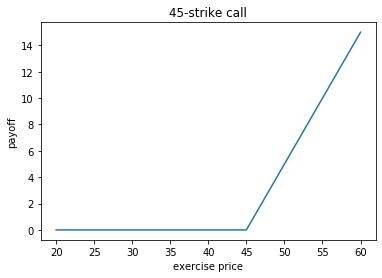

In [8]:
# The code for the payoff of 45-strike call
opt1 = VanillaOption(otype = 1, strike = 45, maturity= 1.) 
stk_list = range(20, 61)
payoff_list1 = [opt1.payoff(s) for s in stk_list]
plt.plot(stk_list, payoff_list1) 

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('45-strike call');
plt.show()


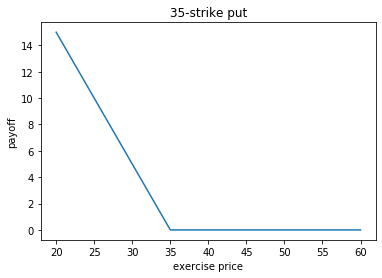

In [9]:
# The code for the payoff of 35-strike put
opt2 = VanillaOption(otype = -1, strike = 35, maturity= 1.) 
stk_list = range(20, 61)
payoff_list2 = [opt2.payoff(s) for s in stk_list]
plt.plot(stk_list, payoff_list2) 

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('35-strike put');
plt.show()

In [0]:
import numpy as np


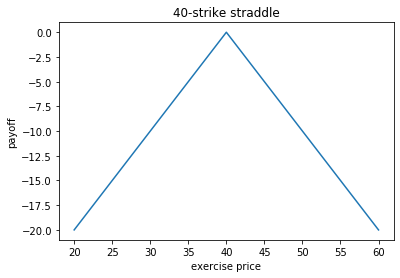

In [11]:
# The code for the payoff of 40-strike straddle
opt3 = VanillaOption(otype = 1, strike = 40, maturity= 1.) 
stk_list = range(20, 61)
payoff_list3 = [opt3.payoff(s) for s in stk_list]
opt4 = VanillaOption(otype = -1, strike = 40, maturity= 1.) 
stk_list = range(20, 61)
payoff_list4 = [opt4.payoff(s) for s in stk_list]
payoff_list5 = np.array(payoff_list3) + np.array(payoff_list4)
plt.plot(stk_list,-payoff_list5)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('40-strike straddle');
plt.show()

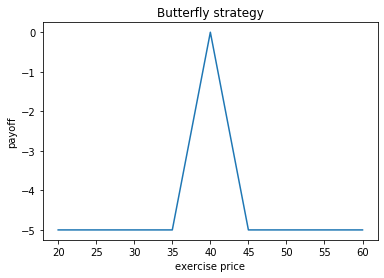

In [12]:
# The code for the payoff of butterfly
payoff_list6 = np.array(payoff_list1) + np.array(payoff_list2) - np.array(payoff_list5)
plt.plot(stk_list,payoff_list6)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('Butterfly strategy');
plt.show()